# GCC118 - Programação Matemática
## Universidade Federal de Lavras
### Instituto de Ciências Exatas e Tecnológicas
#### Profa. Andreza C. Beezão Moreira (DMM/UFLA)
#### Prof. Mayron César O. Moreira (DCC/UFLA)

*Gerando um grafo não-direcionado conexo*

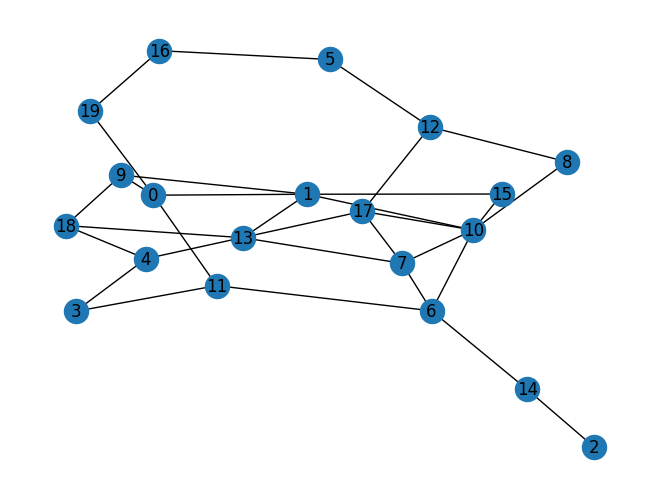

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# n: numero de vertices
# m: numero de arestas
def gera_grafo_nao_direcionado_conexo(n, m):
    if(m < n - 1 or m > n * (n - 1) // 2):
      return None

    grafo = nx.Graph()
    vertices = list(range(n))
    grafo.add_nodes_from(vertices)
    random.shuffle(vertices)
    for i in range(n - 1):
        grafo.add_edge(vertices[i], vertices[i + 1])

    while grafo.number_of_edges() < m:
        u, v = random.sample(vertices, 2)
        if not grafo.has_edge(u, v):
            grafo.add_edge(u, v)

    return grafo

n = 20
m = 30
grafo = gera_grafo_nao_direcionado_conexo(n, m)

if(grafo != None):
  nx.draw(grafo, with_labels=True)
  plt.show()


## MODELAGEM

### Variáveis

- $x_i \in \{0,1\}$ -> igual a 1 se o vértice $i$ pertence a $V_2$ e igual a 0 se o vértice $i$ pertence a $V_1$
- $y_{ij} \in \{0,1\}$ -> igual a 1 se a aresta $(i,j)$ corta as partições $V_1$ e $V_2$ e igual a 0 caso contrário (a aresta está dentro de uma partição)

### Função

$$
max \space f(x) = \sum_{(i,j) \space \in \space A} y_{ij}
$$

### Restrições

- Forçar $y_{ij}$ igual a 0 se $x_i$ e $x_j$ estiverem na mesma partição

$$
y_{ij} \leq x_i - x_j
$$


In [20]:
!pip install gurobipy
from gurobipy import GRB, Model

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 30 rows, 80 columns and 90 nonzeros
Model fingerprint: 0x24ce094d
Variable types: 0 continuous, 80 integer (80 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective -0.0000000
Found heuristic solution: objective 15.0000000
Presolve removed 30 rows and 80 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.03 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 3: 21 15 -0 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.100000000000e+01, best bound 2.100000000000e+01, gap 0.00

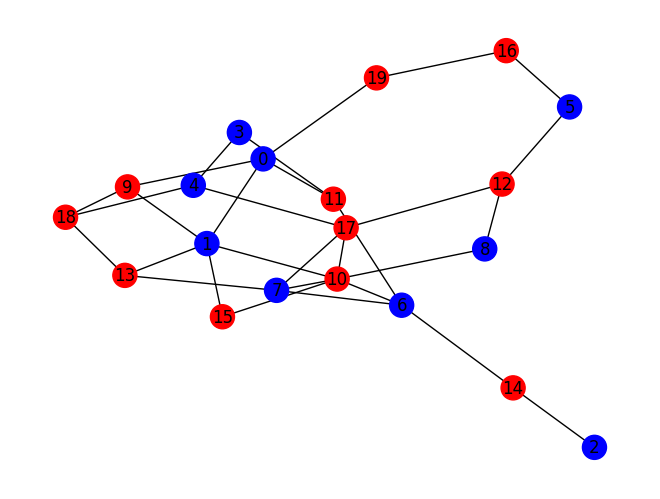

In [30]:
modelo = Model("particao")

x = {}
for i in range(grafo.number_of_nodes()):
  x[i] = modelo.addVar(vtype=GRB.BINARY, name=f"x_{i}")

y = {}
for i in range(grafo.number_of_nodes()):
  y[i] = {}
  for j in range(grafo.number_of_nodes()):
    if((i,j) in grafo.edges()):
      y[i][j] = modelo.addVar(vtype=GRB.BINARY, name=f"y_{i}_{j}")

modelo.setObjective(sum(y[u][v] for u,v in grafo.edges()), GRB.MAXIMIZE)

for u,v in grafo.edges():
  modelo.addConstr(y[u][v] <= x[u] - x[v])

modelo.optimize()

if(modelo.status==GRB.OPTIMAL):
  print(f"\n\nFunção Objetivo: {modelo.objVal}")
  print(f"Particão V1: {', '.join(str(i) for i in range(grafo.number_of_nodes()) if modelo.getVarByName(f'x_{i}').x == 0)}")
  print(f"Particão V2: {', '.join(str(i) for i in range(grafo.number_of_nodes()) if modelo.getVarByName(f'x_{i}').x == 1)}")
  cores = ['red' if modelo.getVarByName(f'x_{i}').x == 0 else 'blue' for i in range(grafo.number_of_nodes())]
  nx.draw(grafo, pos = nx.spring_layout(grafo), with_labels=True, node_color=cores)
  plt.show()
else:
  print("Não foi possível encontrar uma solução")